# Ensemble Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl

# Voting classifiers

In [3]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(
    1, 10001).reshape(-1, 1)

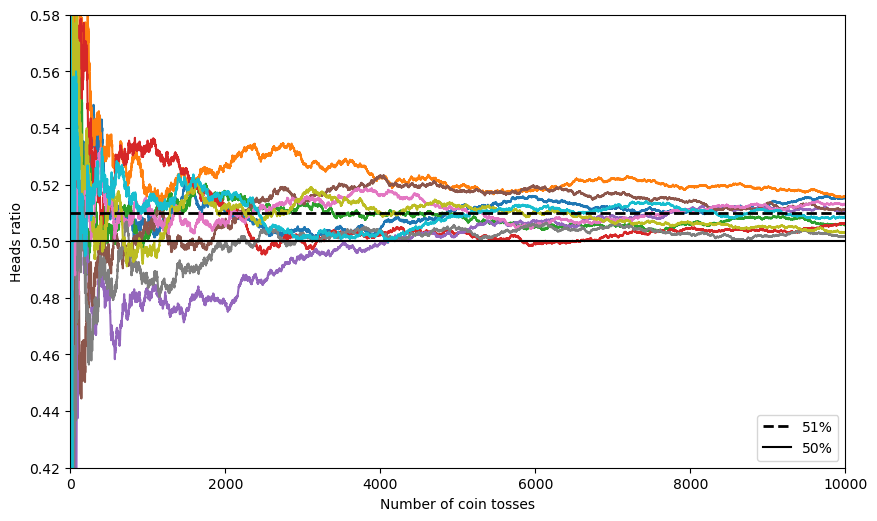

In [4]:
_, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.plot(cumulative_heads_ratio)
ax.plot([0, 10000], [0.51, 0.51], "k--", lw=2, label="51%")
ax.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
ax.set(xlabel="Number of coin tosses",
       ylabel="Heads ratio",
       xlim=[0, 10000],
       ylim=[0.42, 0.58])
ax.legend(loc="lower right")

plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [6]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [8]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf),
                                          ('svc', svm_clf)],
                              voting='hard')


In [9]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [11]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


Soft voting:

In [12]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf),
                                          ('svc', svm_clf)],
                              voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [13]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Bagging ensembles

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",
                                                   max_leaf_nodes=16),
                            n_estimators=500,
                            bootstrap=True,
                            random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_pred))

0.912


In [17]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [18]:
from matplotlib.colors import ListedColormap

In [19]:
def make_mesh(lims, h):
    x = np.linspace(lims[0], lims[1], h)
    y = np.linspace(lims[2], lims[3], h)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

In [20]:
def plot_decision_boundary(clf,
                           X,
                           y,
                           ax,
                           lims=[-1.5, 2.45, -1, 1.5],
                           contour=True):

    x1, x2 = make_mesh(lims, 100)
    X_new = np.c_[x1.flatten(), x2.flatten()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", alpha=0.2)
    ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", alpha=0.2)
    ax.set(xlabel=r"$x_1$", ylabel=r"$x_2$")

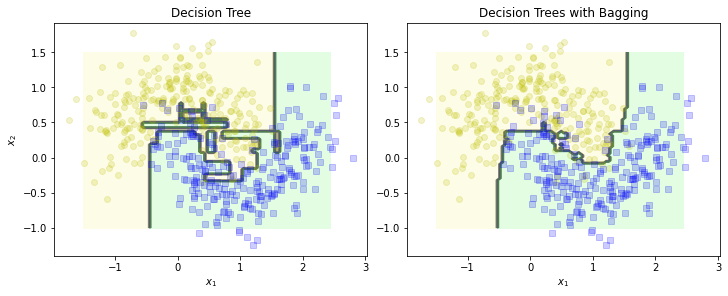

In [21]:
_, axes = plt.subplots(1, 2, figsize=(10, 4),  constrained_layout=True)

plot_decision_boundary(tree_clf, X, y, ax=axes[0])
axes[0].set(title="Decision Tree")
plot_decision_boundary(bag_clf, X, y, ax=axes[1])
axes[1].set(title="Decision Trees with Bagging", ylabel="")

plt.show()

## Random Forests

In [22]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [23]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [25]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [26]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

1.0

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()

In [28]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [29]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

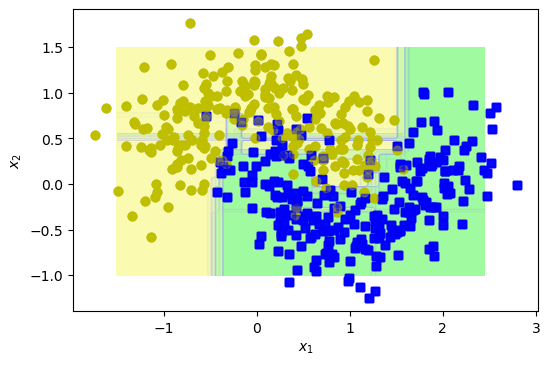

In [30]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf,
                           X,
                           y,
                           ax,
                           lims=[-1.5, 2.45, -1, 1.5],
                           contour=False)

plt.show()

## Out-of-Bag evaluation

In [31]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            bootstrap=True,
                            oob_score=True,
                            random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [32]:
bag_clf.oob_decision_function_[:5]

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [33]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

## Feature importance

In [34]:
X = pd.read_feather('../../data-handson/mnist_784_X.feather')
y = pd.read_feather('../../data-handson/mnist_784_y.feather')
X = X.to_numpy()
y = y.to_numpy()

In [35]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X, y)

/var/folders/py/n14256yd5r5ddms88x9bvsv40000gn/T/ipykernel_14876/867223868.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X, y)


RandomForestClassifier(random_state=42)

In [36]:
def plot_digit(data, ax):
    image = data.reshape(28, 28)
    img = ax.imshow(image, cmap=mpl.cm.hot, interpolation="nearest")
    ax.axis("off")
    return img

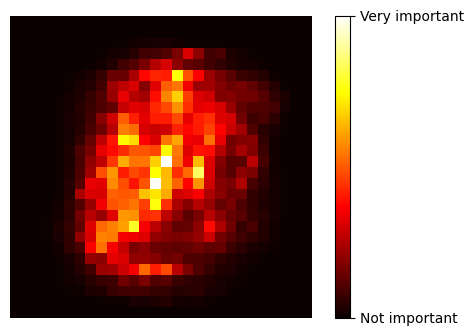

In [37]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

img = plot_digit(rnd_clf.feature_importances_, ax)

cbar = _.colorbar(img,
                    ticks=[
                        rnd_clf.feature_importances_.min(),
                        rnd_clf.feature_importances_.max()
                    ],
                    ax=ax)

cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# AdaBoost

In [38]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

In [40]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm="SAMME.R",
                             learning_rate=0.5,
                             random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

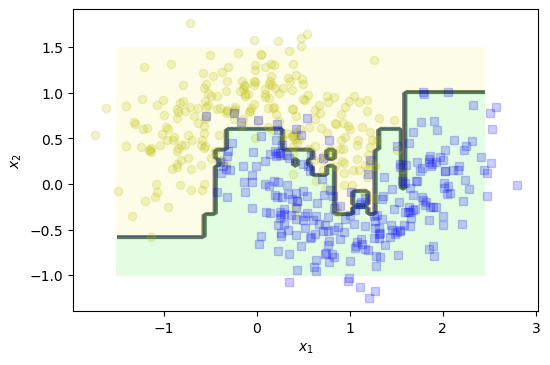

In [41]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_decision_boundary(ada_clf, X, y, ax=ax)

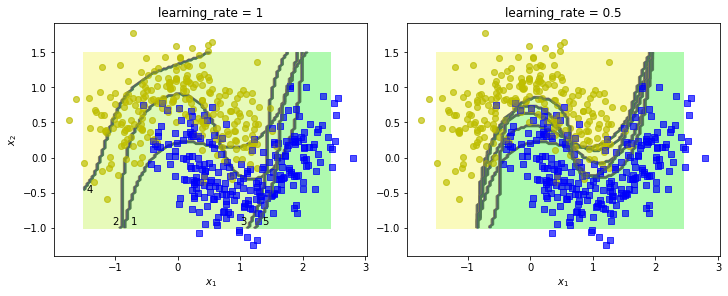

In [42]:
m = len(X_train)

_, axes = plt.subplots(1, 2, figsize=(10, 4),  constrained_layout=True)

for learning_rate, ax in zip((1, 0.5), axes.flatten()):
    sample_weights = np.ones(m) / m

    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[
            y_pred != y_train].sum() / sample_weights.sum()  # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r)  # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha)  # equation 7-3
        sample_weights /= sample_weights.sum()  # normalization step

        plot_decision_boundary(svm_clf, X, y, ax)
        ax.set(title=f"learning_rate = {learning_rate}")
    if learning_rate == 1:
        ax.text(-0.75, -0.95, "1", fontsize='medium')
        ax.text(-1.05, -0.95, "2", fontsize='medium')
        ax.text(1.0, -0.95, "3", fontsize='medium')
        ax.text(-1.45, -0.5, "4", fontsize='medium')
        ax.text(1.36, -0.95, "5", fontsize='medium')
    else:
        ax.set(ylabel="")

plt.show()

# Gradient Boosting

In [43]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [46]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [47]:
def plot_predictions(regressors,
                     X,
                     y,
                     ax,
                     lims,
                     ensemble=False,
                     residual=False,
                     label=None):

    x1 = np.linspace(lims[0], lims[1], 500)
    y_pred = sum(
        regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)

    style = "r-" if ensemble else "g-"
    data_style = "k+" if residual else "b."
    data_label = "Residuals" if residual else "Training Set"

    ax.plot(X[:, 0], y, data_style, label=data_label)
    ax.plot(x1, y_pred, style, lw=2, label=label)
    ax.set(xlim=[lims[0], lims[1]], ylim=[lims[2], lims[3]])
    ax.legend(loc="upper center", fontsize='large')

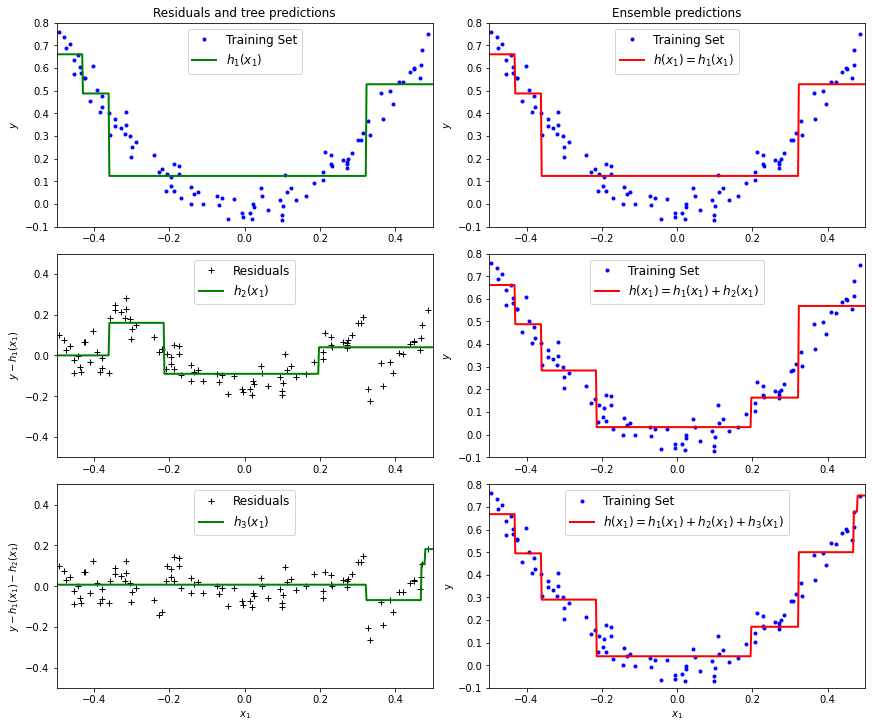

In [48]:
_, axes = plt.subplots(3,
                       2,
                       figsize=(12, 10),
                       
                       constrained_layout=True)

data_ys = [y, y, y2, y, y3, y]
regs = [[tree_reg1], [tree_reg1], [tree_reg2], [tree_reg1, tree_reg2],
         [tree_reg3], [tree_reg1, tree_reg2, tree_reg3]]
lims = [[-0.5, 0.5, -0.1, 0.8], [-0.5, 0.5, -0.1, 0.8], [-0.5, 0.5, -0.5, 0.5],
        [-0.5, 0.5, -0.1, 0.8], [-0.5, 0.5, -0.5, 0.5], [-0.5, 0.5, -0.1, 0.8]]
labels = [
    "$h_1(x_1)$", "$h(x_1) = h_1(x_1)$", "$h_2(x_1)$",
    "$h(x_1) = h_1(x_1) + h_2(x_1)$", "$h_3(x_1)$",
    "$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$"
]
ylabels = [
    "$y$", "$y$", "$y - h_1(x_1)$", "$y$", "$y - h_1(x_1) - h_2(x_1)$", "y"
]
ensembles = [False, True, False, True, False, True]
residuals = [False, False, True, False, True, False]

for reg, data_y, lim, ylabel, label, ensemble, residual, ax in zip(
        regs, data_ys, lims, ylabels, labels, ensembles, residuals,
        axes.flatten()):

    plot_predictions(reg,
                     X,
                     data_y,
                     ax,
                     lims=lim,
                     ensemble=ensemble,
                     residual=residual,
                     label=label)
    ax.set(ylabel=ylabel)

axes[0, 0].set(title="Residuals and tree predictions")
axes[0, 1].set(title="Ensemble predictions")
axes[2, 0].set(xlabel="$x_1$")
axes[2, 1].set(xlabel="$x_1$")

plt.show()

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=3,
                                 learning_rate=1.0,
                                 random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [51]:
gbrt_slow = GradientBoostingRegressor(max_depth=2,
                                      n_estimators=200,
                                      learning_rate=0.1,
                                      random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

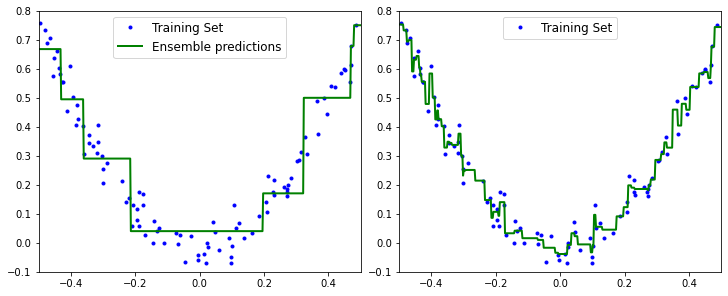

In [52]:
_, axes = plt.subplots(1, 2, figsize=(10, 4),  constrained_layout=True)

plot_predictions([gbrt],
                 X,
                 y,
                 ax=axes[0],
                 lims=[-0.5, 0.5, -0.1, 0.8],
                 label="Ensemble predictions")
ax.set(xlabel="$x_1$",
       ylabel="$y$",
       title=
       f"learning_rate={gbrt.learning_rate}, n_estimators={gbrt.n_estimators}")

plot_predictions([gbrt_slow], X, y, lims=[-0.5, 0.5, -0.1, 0.8], ax=axes[1])
ax.set(
    xlabel="$x_1$",
    title=
    f"learning_rate={gbrt_slow.learning_rate}, n_estimators={gbrt_slow.n_estimators}",
)

plt.show()

## Gradient Boosting with Early stopping

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=120,
                                 random_state=42)
gbrt.fit(X_train, y_train)

errors = [
    mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)
]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,
                                      n_estimators=bst_n_estimators,
                                      random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [55]:
min_error = np.min(errors)

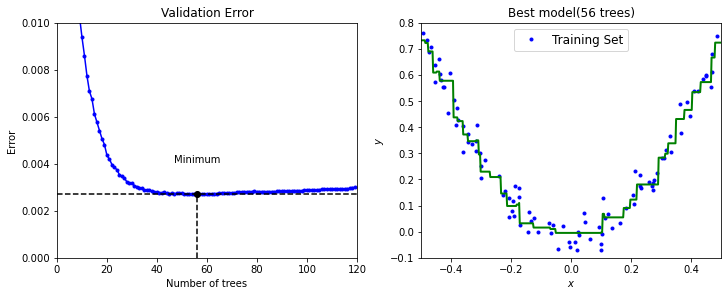

In [56]:
_, axes = plt.subplots(1, 2, figsize=(10, 4),  constrained_layout=True)

axes[0].plot(errors, "b.-")
axes[0].plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
axes[0].plot([0, 120], [min_error, min_error], "k--")

axes[0].plot(bst_n_estimators, min_error, "ko")
axes[0].text(bst_n_estimators,
             min_error * 1.5,
             "Minimum",
             ha="center",
             fontsize='medium')
axes[0].set(xlim=[0, 120],
            ylim=[0, 0.01],
            xlabel="Number of trees",
            ylabel="Error",
            title="Validation Error")

plot_predictions([gbrt_best], X, y, lims=[-0.5, 0.5, -0.1, 0.8], ax=axes[1])
axes[1].set(xlabel="$x$",
            ylabel="$y$",
            title=f"Best model({bst_n_estimators} trees)")

plt.show()

In [57]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [58]:
print(gbrt.n_estimators)

61


In [59]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


# Voting Classifier

In [60]:
X = pd.read_feather('../../data-handson/mnist_784_X.feather')
y = pd.read_feather('../../data-handson/mnist_784_y.feather')
X = X.to_numpy()
y = y.to_numpy()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                            y,
                                                            test_size=10000,
                                                            random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=10000,
                                                  random_state=42)

Exercise: _Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM._

In [63]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC

In [64]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)

In [65]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train.ravel())

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)


In [66]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9692, 0.9715, 0.859]

The linear SVM is far outperformed by the other classifiers. However, let's keep it for now since it may improve the voting classifier's performance.

Exercise: _Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier._

In [67]:
from sklearn.ensemble import VotingClassifier

In [68]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf)
]

In [69]:
voting_clf = VotingClassifier(named_estimators)

In [70]:
voting_clf.fit(X_train, y_train.ravel())

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42,
                                        tol=20))])

In [71]:
voting_clf.score(X_val, y_val)

0.9693

In [72]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9692, 0.9715, 0.859]

Let's remove the SVM to see if performance improves. It is possible to remove an estimator by setting it to `None` using `set_params()` like this:

In [73]:
voting_clf.set_params(svm_clf=None)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf', None)])

This updated the list of estimators:

In [74]:
voting_clf.estimators

[('random_forest_clf', RandomForestClassifier(random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(random_state=42)),
 ('svm_clf', None)]

However, it did not update the list of _trained_ estimators:

In [75]:
voting_clf.estimators_

[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 LinearSVC(max_iter=100, random_state=42, tol=20)]

So we can either fit the `VotingClassifier` again, or just remove the SVM from the list of trained estimators:

In [76]:
del voting_clf.estimators_[2]

Now let's evaluate the `VotingClassifier` again:

In [77]:
voting_clf.score(X_val, y_val)

0.9713

A bit better! The SVM was hurting performance. Now let's try using a soft voting classifier. We do not actually need to retrain the classifier, we can just set `voting` to `"soft"`:

In [78]:
voting_clf.voting = "soft"

In [79]:
voting_clf.score(X_val, y_val)

0.9719

Nope, hard voting wins in this case.

_Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?_

In [80]:
voting_clf.voting = "hard"
voting_clf.score(X_test, y_test)

0.9648

In [81]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9645, 0.9691]

The voting classifier only very slightly reduced the error rate of the best model in this case.

# Stacking Ensemble

Exercise: _Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image's class. Train a classifier on this new training set._

In [82]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [83]:
X_val_predictions

array([[5., 5., 5.],
       [8., 8., 8.],
       [2., 2., 3.],
       ...,
       [7., 7., 7.],
       [6., 6., 6.],
       [7., 7., 7.]], dtype=float32)

In [84]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val.ravel())

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [85]:
rnd_forest_blender.oob_score_

0.9703

You could fine-tune this blender or try other types of blenders (e.g., an `MLPClassifier`), then select the best one using cross-validation, as always.

Exercise: _Congratulations, you have just trained a blender, and together with the classifiers they form a stacking ensemble! Now let's evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble's predictions. How does it compare to the voting classifier you trained earlier?_

In [86]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [87]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test, y_pred)

0.9661

This stacking ensemble does not perform as well as the voting classifier we trained earlier, it's not quite as good as the best individual classifier.